<a href="https://colab.research.google.com/github/JonSantos08/ds-cheatsheets/blob/master/Intervalos_de_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimación Puntual** 

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
np.random.seed(2020)
population_ages_1 = stats.poisson.rvs(loc = 18, mu = 35, size = 1500000)
population_ages_2 = stats.poisson.rvs(loc = 18, mu = 10, size = 1000000)
population_ages= np.concatenate((population_ages_1, population_ages_2))
print(population_ages_1.mean())
print(population_ages_2.mean())
print(population_ages.mean())

52.998824666666664
27.999569
42.9991224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f39b71c90>]],
      dtype=object)

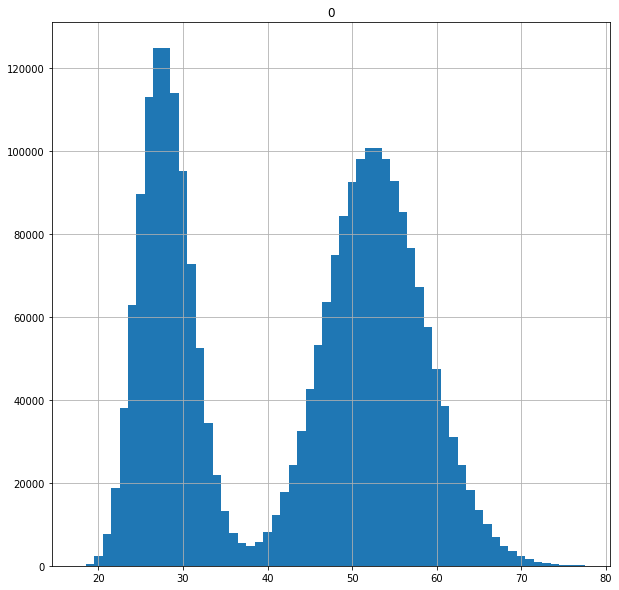

In [ ]:
pd.DataFrame(population_ages).hist(bins=60, range=(17.5, 77.5), figsize = (10,10))

In [ ]:
stats.skew(population_ages)

-0.11907136129560125

In [ ]:
stats.kurtosis(population_ages)

-1.4593749125303193

In [ ]:
np.random.seed(42)
sample_ages = np.random.choice(population_ages, 500)
print(sample_ages.mean())

42.356


In [ ]:
population_ages.mean() - sample_ages.mean()

0.6431223999999958

In [ ]:
for race in set(population_races):
  print("Proporción de "+race)
  print(population_races.count(race)/2500000)

Proporción de blanca
0.4
Proporción de asiatica
0.1
Proporción de negra
0.2
Proporción de hispana
0.2
Proporción de otros
0.1


In [ ]:
population_races = (["blanca"]*1000000) + (["negra"]*500000) + (["hispana"]*500000) + (["asiatica"]*250000) + (["otros"]*250000)

In [ ]:
random.seed(31)
race_sample = random.sample(population_races, 1000)

In [ ]:
for race in set(race_sample):
  print("Proporción de "+race)
  print(race_sample.count(race)/1000)

Proporción de blanca
0.379
Proporción de asiatica
0.101
Proporción de negra
0.217
Proporción de hispana
0.201
Proporción de otros
0.102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f39126350>]],
      dtype=object)

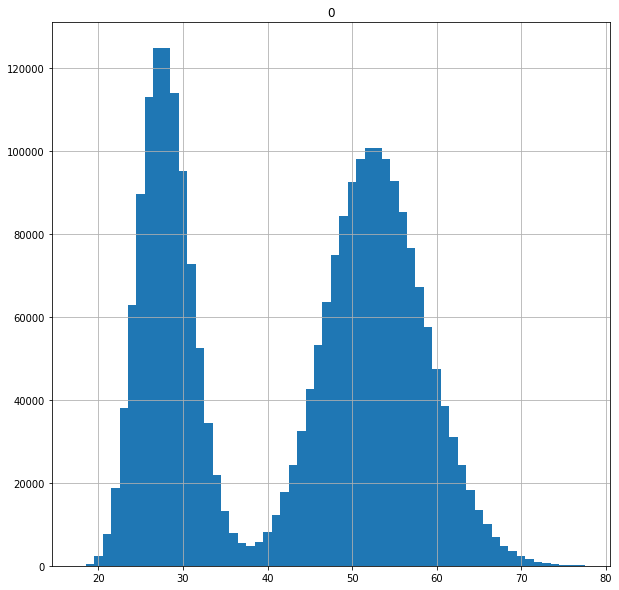

In [ ]:
pd.DataFrame(population_ages).hist(bins=60, range=(17.5, 77.5), figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f38fc2a90>]],
      dtype=object)

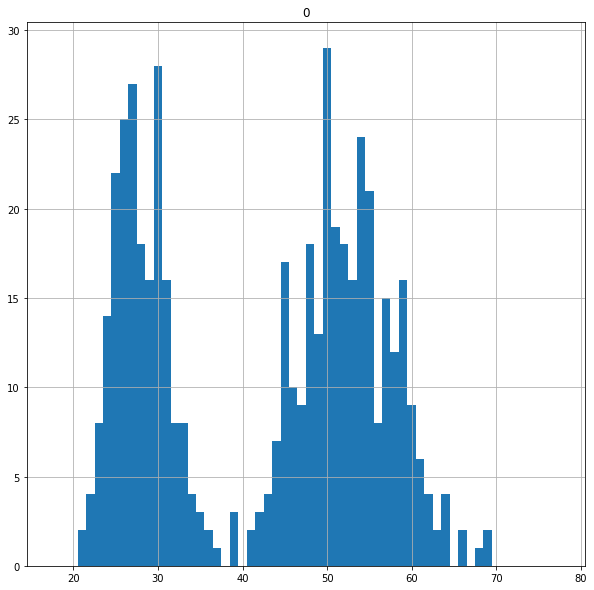

In [ ]:
pd.DataFrame(sample_ages).hist(bins=60, range=(17.5, 77.5), figsize = (10,10))

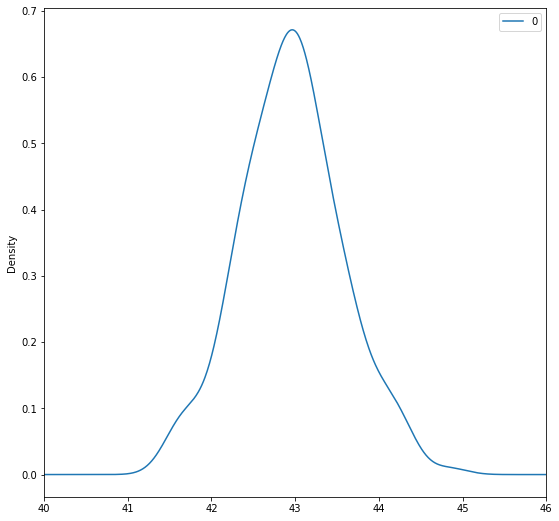

In [ ]:
np.random.sample(1988)

point_estimates = []

for x in range(200):
  sample = np.random.choice(population_ages, size = 500)
  point_estimates.append(sample.mean())

pd.DataFrame(point_estimates).plot(kind="density", figsize = (9,9), xlim=(40,46) )

In [ ]:
np.array(point_estimates).mean()

42.95199

## **Si conocemos la desviación típica**

In [ ]:
np.random.seed(10)

n = 1000
alpha = 0.05
sample = np.random.choice (population_ages, size=n)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 1-alpha/2)

sigma = population_ages.std() ##Sigma de la población

sample_error = z_critical * sigma/math.sqrt(n)

ci = (sample_mean - sample_error, sample_mean + sample_error)
ci ## 

(42.23912299964774, 43.878877000352254)

In [ ]:
np.random.seed(10)

n = 1000
alpha = 0.05

intervals = []
sample_means = []

z_critical = stats.norm.ppf(q = 1-alpha/2)

sigma = population_ages.std() ##Sigma de la población

sample_error = z_critical * sigma/math.sqrt(n)
for sample in range(100):

  sample = np.random.choice(population_ages, size=n)
  sample_mean = sample.mean()
  sample_means.append(sample_mean)

  ci = (sample_mean - sample_error, sample_mean + sample_error)
  intervals.append(ci)

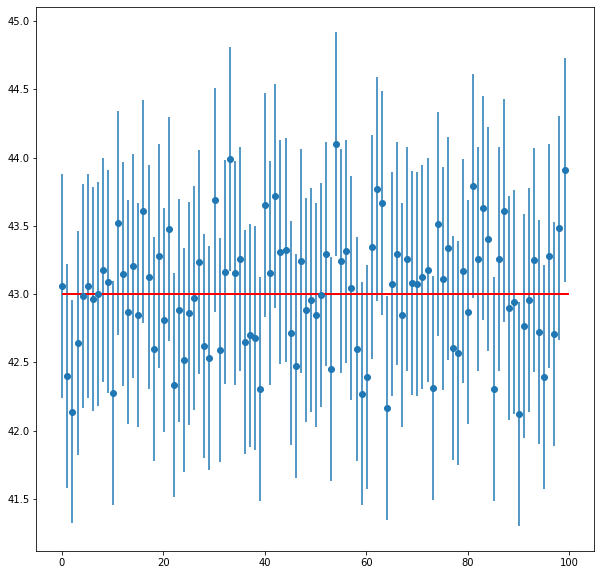

In [ ]:
plt.figure(figsize = (10,10))
plt.errorbar(x = np.arange(0.1, 100, 1), y = sample_means, yerr = [(top-bottom)/2 for top, bottom in intervals], fmt='o')
plt.hlines(xmin=0, xmax=100, y = population_ages.mean(), linewidth=2.0, color="red")

## **Si la desviación típica no es conocida...**

In [ ]:
np.random.seed(10)

n = 25
alpha = 0.05

sample = np.random.choice (population_ages, size=n)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 1-alpha/2, df= n-1)

sample_sd = sample.std(ddof=1) ##Desviación estandar de la muestra

sample_error = t_critical * sample_sd/math.sqrt(n)

ci = (sample_mean - sample_error, sample_mean + sample_error)
ci 

(38.66197902104285, 49.73802097895715)

In [ ]:
stats.t.ppf(q = 1-alpha, df=n-1) - stats.norm.ppf(1-alpha)

0.06602845295795534

In [ ]:
stats.t.ppf(q = 1-alpha, df=999) - stats.norm.ppf(1-alpha)

0.0015267184760627828

In [ ]:
stats.t.interval(alpha = 0.95, df = 24, loc = sample_mean, scale = sample_sd/math.sqrt(n))

(38.66197902104285, 49.73802097895715)

## **Intervalo para la proporción poblacional**

In [53]:
alpha=0.05
n = 1000
z_critical = stats.norm.ppf(q = 1-alpha/2)
p_hat = race_sample.count("blanca")/ n

sample_error = z_critical * math.sqrt((p_hat*(1-p_hat)/n))

ci = (p_hat - sample_error, p_hat + sample_error)
ci

(0.34893138003533003, 0.40906861996467)

In [54]:
stats.norm.interval(alpha = 0.95, loc = p_hat, scale = math.sqrt(p_hat*(1-p_hat)/n))

(0.34893138003533003, 0.40906861996467)

##**Cómo interpretar el intervalo de confianza**

In [55]:
shape, scale = 2.0, 2.0, #mean = 4, std = 2*sqrt(2)
S = np.random.gamma(shape, scale, 1000000)

mu = shape*scale 
sigma = scale*np.sqrt(shape)


In [60]:
print(mu)
print(sigma)

4.0
2.8284271247461903


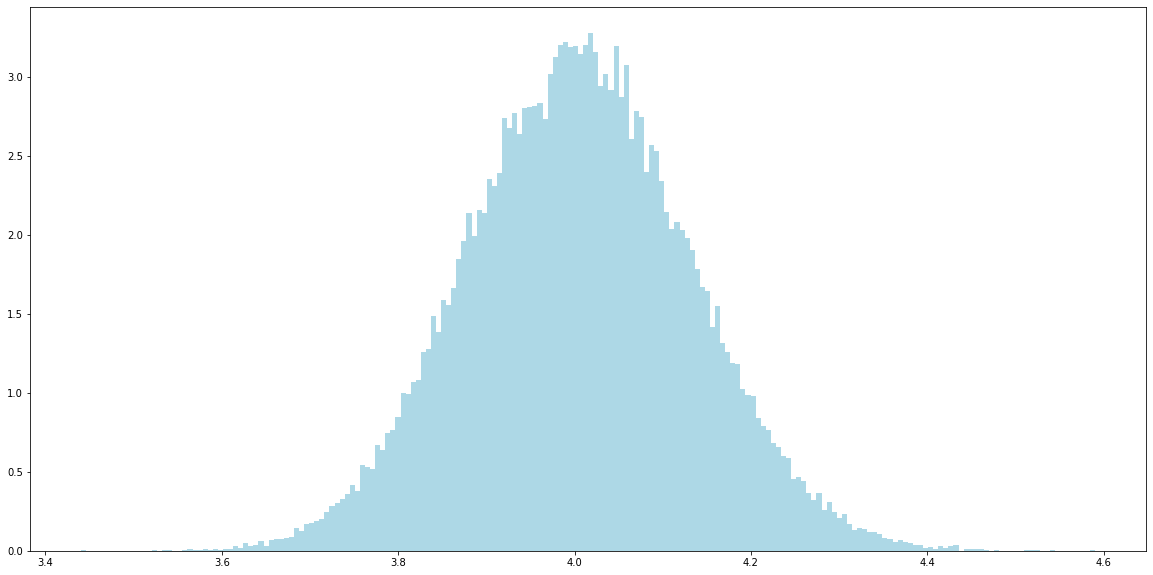

In [58]:
meansample = []
sample_size = 500
for i in range(0,50000):
  sample = random.choices(S, k = sample_size)
  meansample.append(sum(sample)/len(sample))

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.show()

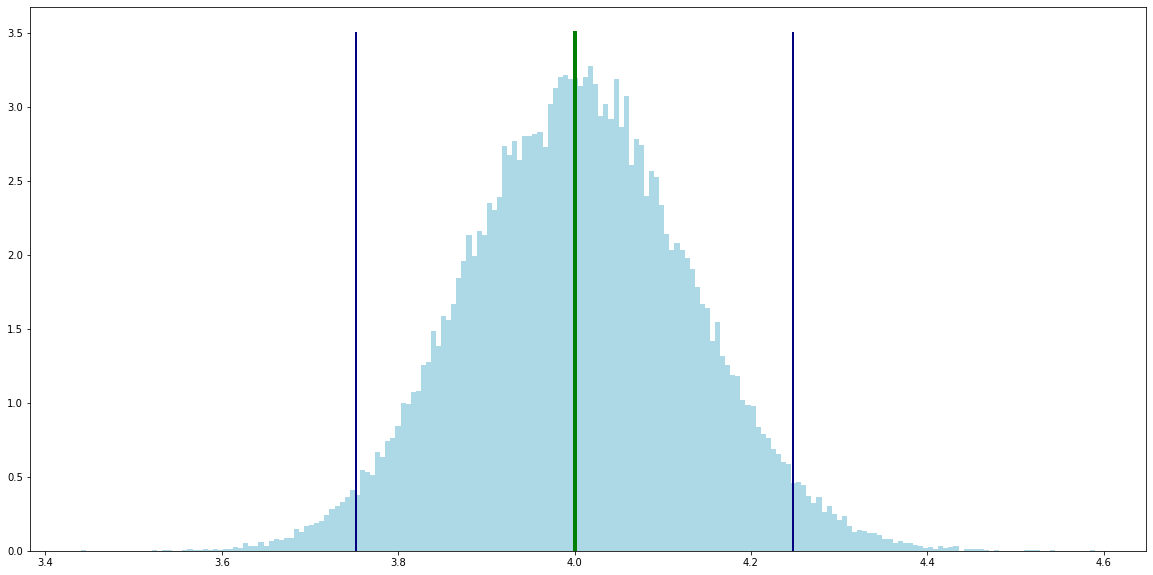

In [63]:
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.plot([mu,mu], [0,3.5], 'k-', lw = 4, color='green')
plt.plot([mu-1.96*sigma/np.sqrt(sample_size),mu-1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color = 'navy')
plt.plot([mu+1.96*sigma/np.sqrt(sample_size),mu+1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color = 'navy')
plt.show()

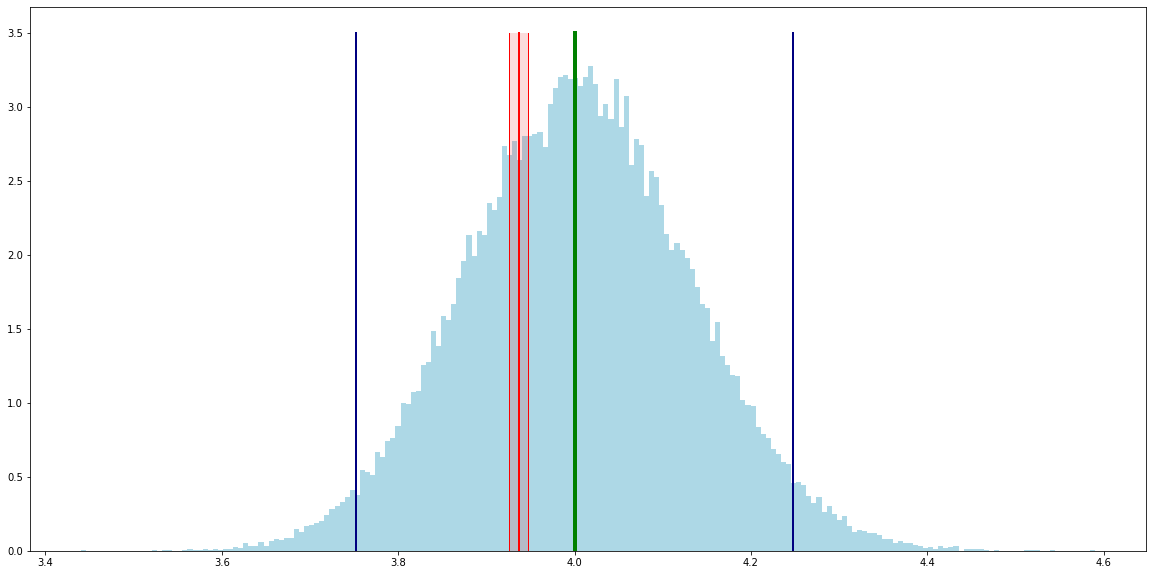

In [82]:
sample_data = np.random.choice(S, size = sample_size)
x_bar = sample_data.mean()
ss = sample_data.std()/np.sqrt(sample_size)

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")
plt.plot([mu,mu], [0,3.5], 'k-', lw = 4, color='green')
plt.plot([mu-1.96*sigma/np.sqrt(sample_size),mu-1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color = 'navy')
plt.plot([mu+1.96*sigma/np.sqrt(sample_size),mu+1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color = 'navy')
plt.plot([x_bar, x_bar],[0,3.5], 'k-', lw=2, color = 'red')
plt.plot([x_bar-1.96*ss/np.sqrt(sample_size), x_bar-1.96*ss/np.sqrt(sample_size)], [0,3.5],'k-', lw=1, color = 'red')
plt.plot([x_bar+1.96*ss/np.sqrt(sample_size), x_bar+1.96*ss/np.sqrt(sample_size)], [0,3.5],'k-', lw=1, color = 'red')
plt.gca().add_patch(plt.Rectangle((x_bar-1.96*ss/np.sqrt(sample_size), 0), 2*(1.96*ss/np.sqrt(sample_size)), 3.5, fill=True, fc = (0.9, 0.1, 0.1, 0.15)))

plt.show()

In [90]:
interval_list = []
z_critical = 1.96 #z_0.975
sample_size = 50
c = 0
error = z_critical*sigma/np.sqrt(sample_size)
for i in range(0,100):
  rs = random.choices(S, k = sample_size)
  mean = np.mean(rs)
  ub = mean + error
  lb = mean - error
  interval_list.append([lb, mean , ub])
  if ub >= mu and lb <=mu:
    c+=1


In [91]:
print(c)

97


Número de intervalos de confianza que contienen el valor real de mu :  97


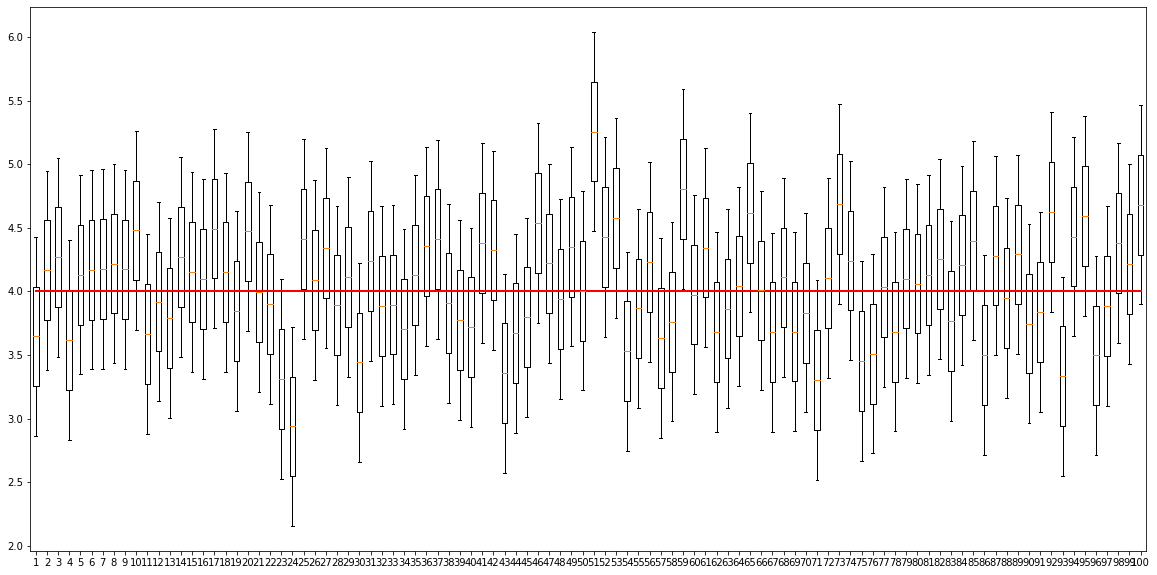

In [92]:
print("Número de intervalos de confianza que contienen el valor real de mu : ", c)
plt.figure(figsize=(20,10))
plt.boxplot(interval_list)
plt.plot([1,100], [mu, mu], 'k-', lw=2, color='red')
plt.show()